In [1]:
import os
import time
import shutil
import pickle

import torch
import torch.nn.functional as F

from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
# from tensorboard_logger import configure, log_value

from model import RecurrentAttention
from utils import AverageMeter

from torchvision import transforms, utils, models
from PIL import Image

import torch

import utils
import data_loader

from trainer import Trainer
from config import get_config

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

import pandas as pd

import json

In [2]:
def load_inputs(impath):
    to_tens = transforms.ToTensor()
    return to_tens(Image.open(impath).convert('RGB')).unsqueeze(0)

In [3]:
# type(mig_data)

In [4]:
m = open("../pooling/data/migration_data.json",)
mig_data = json.load(m)
m.close()
mig_data = pd.DataFrame.from_dict(mig_data, orient = 'index').reset_index()
mig_data.columns = ['muni_id', 'num_migrants']
q = 2
mig_data['class'] = pd.qcut(mig_data['num_migrants'], q = q, labels = [i for i in range(q)])
mig_data

,muni_id,num_migrants,class
0,484001001,42055.0,1
1,484001002,4017.0,1
2,484001003,11992.0,1
3,484001004,762.0,1
4,484001005,7551.0,1
...,...,...,...
2326,484032049,2487.0,1
2327,484032050,2024.0,1
2328,484032051,3084.0,1
2329,484032052,2919.0,1


In [5]:
mig_data['class'].value_counts()

0    1166
1    1165
Name: class, dtype: int64

In [6]:
def get_png_names(directory):
    images = []
    for i in os.listdir(directory):
        try:
            if os.path.isdir(os.path.join(directory, i)):
                new_path = os.path.join(directory, i, "pngs")
                image = os.listdir(new_path)[0]
                images.append(os.path.join(directory, i, "pngs", image))
        except:
            pass
    return images


            

image_names = get_png_names("../pooling/data/MEX/")

ys = []
for i in image_names:
        dta = mig_data[mig_data["muni_id"] == i.split("/")[4]]
        if len(dta) != 0:
            ys.append(dta['class'].values[0])

In [7]:
import random

train_num = int(len(image_names) * .70)

train_indices = random.sample(range(0, len(image_names)), train_num)
val_indices = [i for i in range(0, len(image_names)) if i not in train_indices]



# import random

# train_num = int(500 * .70)

# train_indices = random.sample(range(0, 500), train_num)
# val_indices = [i for i in range(0, 500) if i not in train_indices]

In [9]:
import torchvision

batch_size = 1

# train = [(load_inputs(image_paths[i]).squeeze()[:, 0:28, 0:28], ys[i]) for i in range(0, 93)]
# val = [(load_inputs(image_paths[i]).squeeze()[:, 0:28, 0:28], ys[i]) for i in range(93, 133)]

# brighten = torchvision.transforms.functional.adjust_brightness(brightness_factor = 2)


train = [(torchvision.transforms.functional.adjust_brightness(load_inputs(image_names[i]), brightness_factor = 2).squeeze(), ys[i]) for i in train_indices]
val = [(torchvision.transforms.functional.adjust_brightness(load_inputs(image_names[i]), brightness_factor = 2).squeeze(), ys[i]) for i in val_indices]


train_dl = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
val_dl = torch.utils.data.DataLoader(val, batch_size = batch_size, shuffle = True)

In [10]:
print("Num training: ", len(train_dl))
print("Num validation: ", len(val_dl))

Num training:  1204
Num validation:  517


In [11]:
import numpy as np
from utils import plot_images

import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [12]:
config, unparsed = get_config()

In [13]:
trainer = Trainer(config, (train_dl, val_dl))

In [15]:
# test_im_bright = torchvision.transforms.functional.adjust_brightness(test_im, 2)


In [ ]:
trainer.train()

0.2s - loss: 0.969 - acc: 100.000:   3%|▎         | 3/93 [00:00<00:05, 17.70it/s]


[*] Train on 93 samples, validate on 40 samples

Epoch: 1/200 - LR: 0.000300


34.0s - loss: 1.200 - acc: 100.000: : 1204it [00:34, 35.40it/s]                   


train loss: 1.045 - train acc: 50.000 - val loss: 0.992 - val acc: 49.130 - val err: 50.870 [*]


0.2s - loss: 0.792 - acc: 0.000:   5%|▌         | 5/93 [00:00<00:03, 26.88it/s]  


Epoch: 2/200 - LR: 0.000300


32.9s - loss: 0.757 - acc: 0.000: : 1204it [00:32, 36.56it/s]                     
0.0s - loss: 1.301 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 1.029 - train acc: 50.748 - val loss: 0.991 - val acc: 45.455 - val err: 54.545

Epoch: 3/200 - LR: 0.000300


33.3s - loss: 0.907 - acc: 0.000: : 1204it [00:33, 36.18it/s]                     


train loss: 0.972 - train acc: 48.754 - val loss: 0.976 - val acc: 56.093 - val err: 43.907 [*]


0.2s - loss: 0.796 - acc: 0.000:   5%|▌         | 5/93 [00:00<00:02, 32.00it/s]  


Epoch: 4/200 - LR: 0.000300


32.8s - loss: 1.091 - acc: 100.000: : 1204it [00:32, 36.69it/s]                   
0.0s - loss: 0.991 - acc: 100.000:   0%|          | 0/93 [00:00<?, ?it/s]

train loss: 0.982 - train acc: 51.080 - val loss: 0.965 - val acc: 52.224 - val err: 47.776

Epoch: 5/200 - LR: 0.000300


30.8s - loss: 1.034 - acc: 100.000: : 1129it [00:30, 37.62it/s]                   

In [30]:
un = []

for i,o in val_dl:
    if o not in un:
        un.append(o)
        
un

[tensor([0]), tensor([1])]

In [31]:
trues, preds = [], []

for i,o in train_dl:
    trues.append(o.item())
    preds.append(trainer.predict(1, i, o))

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
confusion_matrix(trues, preds)

array([[263, 363],
       [158, 420]])

In [34]:
accuracy_score(trues, preds)

0.5672757475083057

In [18]:
import pickle
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from utils import denormalize, bounding_box

def denormalize(T, coords):
    return 0.5 * ((coords + 1.0) * T)

In [23]:
def plot(plot_dir, epoch):
    # read in pickle files
    glimpses = pickle.load(open(plot_dir + "g_{}.p".format(epoch), "rb"))
    locations = pickle.load(open(plot_dir + "l_{}.p".format(epoch), "rb"))
    
    from ipdb import set_trace

    glimpses = np.concatenate(glimpses)
    glimpses = np.expand_dims(glimpses, axis = 0)
    
    # grab useful params
    size = int(plot_dir.split("_")[2].split("x")[0])
    num_anims = len(locations)
    num_cols = glimpses.shape[0]
    img_shape = glimpses.shape[2]
    
    # denormalize coordinates
    coords = [denormalize(img_shape, l) for l in locations]
    
    print(coords)
    
    if num_cols == 1:
        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

        
        plt.imshow(np.transpose(glimpses[0], (1,2,0)), cmap="Greys_r")
#         plt.get_xaxis().set_visible(False)
#         plt.get_yaxis().set_visible(False)   
        
        def updateData(i):
            color = "r"
            co = coords[i]
            for p in ax.patches:
                p.remove()
            c = co[0]
            rect = bounding_box(c[0], c[1], size, color)
            ax.add_patch(rect)
        
        # animate
        anim = animation.FuncAnimation(
            fig, updateData, frames = num_anims, interval=500, repeat=True
        )

        # save as mp4
        name = plot_dir + "epoch_{}.mp4".format(epoch)
        anim.save(name, extra_args=["-vcodec", "h264", "-pix_fmt", "yuv420p"])        
        
    else:
    
        print(np.array(coords))

        fig, axs = plt.subplots(nrows=1, ncols=num_cols)
        # fig.set_dpi(100)

        # plot base image
        for j, ax in enumerate(axs.flat):
            print(glimpses[j].shape)
            ax.imshow(np.transpose(glimpses[j], (1,2,0)), cmap="Greys_r")
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

        def updateData(i):
            color = "r"
            co = coords[i]
            for j, ax in enumerate(axs.flat):
                for p in ax.patches:
                    p.remove()
                c = co[j]
                rect = bounding_box(c[0], c[1], size, color)
                ax.add_patch(rect)

        # animate
        anim = animation.FuncAnimation(
            fig, updateData, frames = num_anims, interval = 500, repeat = True
        )

        # save as mp4
        name = plot_dir + "epoch_{}.mp4".format(epoch)
        anim.save(name, extra_args=["-vcodec", "h264", "-pix_fmt", "yuv420p"])


[array([[490.54126,   0.     ]], dtype=float32), array([[869.,   0.]], dtype=float32), array([[402.24536,   0.     ]], dtype=float32), array([[453.48874 ,  80.419174]], dtype=float32), array([[837.8343, 316.7637]], dtype=float32), array([[832.06104, 196.02962]], dtype=float32)]


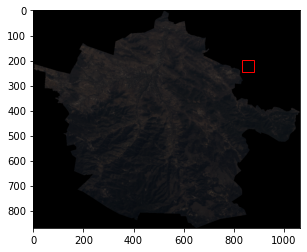

In [29]:
plot("./plots/ram_6_50x50_1/", 10)

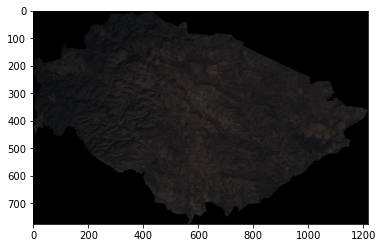

In [38]:
test_im = load_inputs(image_names[0])
plt.imshow(test_im[0].permute(1,2,0))
plt.savefig("./test-nobright.png")

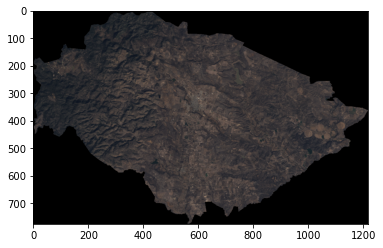

In [37]:
import torchvision

test_im_bright = torchvision.transforms.functional.adjust_brightness(test_im, 2)
plt.imshow(test_im_bright[0].permute(1,2,0))
plt.savefig("./test-bright.png")

In [27]:
start = torch.tensor([[354.45960, 190.8038],
                      [303.23572, 384.5223 ],
                      [270.75626, 31.290562],
                      [265.81564, 191.80267],
                      [265.48273, 338.2395 ],
                      [289.71802, 341.9031 ]])

start + 50

tensor([[404.4596, 240.8038],
        [353.2357, 434.5223],
        [320.7563,  81.2906],
        [315.8156, 241.8027],
        [315.4827, 388.2395],
        [339.7180, 391.9031]])

In [75]:
for i,o in train_loader:
    hm = i
    
    dsfa

NameError: name 'train_loader' is not defined

In [15]:
import matplotlib.pyplot as plt

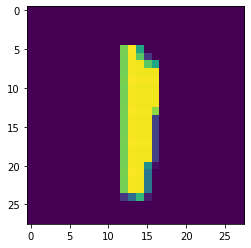

In [16]:
plt.imshow(np.transpose(hm[0], (1,2,0)))

In [17]:
B, C, H, W = hm.shape
size = 8

In [18]:
start[:, 0]

tensor([15.5967, 15.5128, 15.2684, 14.9213, 14.0713, 14.7086, 16.8820, 15.1699])

In [20]:
start = torch.tensor([[15.596725, 15.099442],
       [15.512785, 13.005841],
       [15.268352, 13.694261],
       [14.921265, 14.950024],
       [14.071263, 14.090788],
       [14.708624, 12.661836],
       [16.881996, 14.372852],
       [15.169943, 14.500135]])

# start = start[:, 0]

end = start + size

end

tensor([[23.5967, 23.0994],
        [23.5128, 21.0058],
        [23.2684, 21.6943],
        [22.9213, 22.9500],
        [22.0713, 22.0908],
        [22.7086, 20.6618],
        [24.8820, 22.3729],
        [23.1699, 22.5001]])

In [21]:
hm_padded = F.pad(hm, (size // 2, size // 2, size // 2, size // 2))

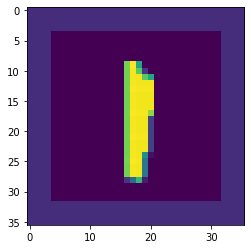

In [22]:
plt.imshow(np.transpose(hm_padded[0], (1,2,0)))

In [25]:
end

tensor([[23.5967, 23.0994],
        [23.5128, 21.0058],
        [23.2684, 21.6943],
        [22.9213, 22.9500],
        [22.0713, 22.0908],
        [22.7086, 20.6618],
        [24.8820, 22.3729],
        [23.1699, 22.5001]])

In [28]:
end[0, 1]

tensor(23.0994)

In [32]:
hm_padded[i, :, start[i, 1] : end[i, 1], start[i, 0] : end[i, 0]

TypeError: slice indices must be integers or None or have an __index__ method

In [23]:
patch = []
for i in range(B):
    patch.append(hm_padded[i, :, start[i, 1] : end[i, 1], start[i, 0] : end[i, 0]])

TypeError: only integer tensors of a single element can be converted to an index

In [ ]:
        B, C, H, W = x.shape

        start = self.denormalize(H, l)
        end = start + size

        # pad with zeros
        x = F.pad(x, (size // 2, size // 2, size // 2, size // 2))

        # loop through mini-batch and extract patches
        patch = []
        for i in range(B):
            patch.append(x[i, :, start[i, 1] : end[i, 1], start[i, 0] : end[i, 0]])
        return torch.stack(patch)

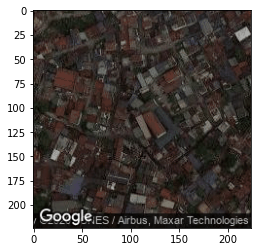

In [30]:
plt.imshow(np.transpose(np.array(train[0][0]), (1,2,0)))#.permute(1,2,0))